# The intention of the following project is to forecast the stock price of Tata Motors stock for the coming 1000 days using a Monte Carlo Simulation on the price data from the period 1-1-2007 till present.

In [1]:
#Start by importing the required libraries

import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [92]:
#Create a pandas dataframe and import closing price data from the web using DataReader
data = pd.DataFrame()
data['TATAMOTORS.NS'] = web.DataReader('TATAMOTORS.NS', data_source = 'yahoo', start= '2007-1-1')['Adj Close']

In [3]:
data.head()

,TATAMOTORS.NS
Date,
2007-01-02,156.477127
2007-01-03,157.950180
2007-01-04,159.440033
2007-01-05,157.807068
2007-01-08,156.308823


In [4]:
data.tail()

,TATAMOTORS.NS
Date,
2021-07-13,310.950012
2021-07-14,309.549988
2021-07-15,310.250000
2021-07-16,311.250000
2021-07-19,308.850006


In [5]:
#Compute the logarithmic returns for each day of our data period
l_returns = np.log(1+data.pct_change())
l_returns.head(10)

,TATAMOTORS.NS
Date,
2007-01-02,NaN
2007-01-03,0.009370
2007-01-04,0.009388
2007-01-05,-0.010295
2007-01-08,-0.009540
2007-01-09,-0.018918
2007-01-10,-0.002913
2007-01-11,0.010839
2007-01-12,0.024577


<AxesSubplot:xlabel='Date'>

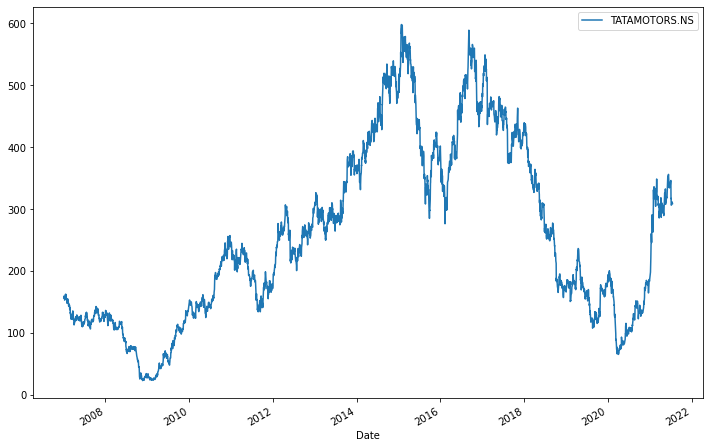

In [6]:
#plotting the price data for the stock
data.plot(figsize = (12,8))

<AxesSubplot:xlabel='Date'>

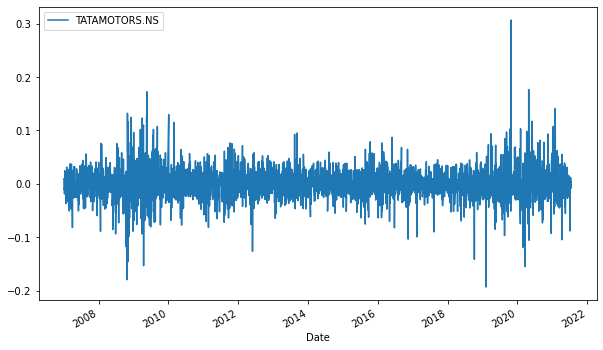

In [7]:
l_returns.plot(figsize=(10,6))
#By plotting the logarithmic returns, we can see that the distribution is close to a normal distribution.

In [9]:
v = l_returns.mean()
v

TATAMOTORS.NS    0.00019
dtype: float64

In [11]:
variance = l_returns.var()
variance

TATAMOTORS.NS    0.000852
dtype: float64

$$
drift = v - \frac{1}{2} \cdot variance
$$

In [12]:
#Computing the drift using mean and variance of logarithmic returns.
drift = v - (0.5*variance)
drift

TATAMOTORS.NS   -0.000236
dtype: float64

In [15]:
std_dev = l_returns.std()
std_dev

TATAMOTORS.NS    0.029188
dtype: float64

In [17]:
type(drift)

pandas.core.series.Series

In [18]:
np.array(drift)

array([-0.00023588])

In [19]:
np.array(std_dev)

array([0.0291881])

In [22]:
#Defining a percent point function using scipy.stats.norm
norm.ppf(0.95)

1.6448536269514722

In [23]:
t = np.random.rand(10,2)
t

array([[0.74605293, 0.84068881],
       [0.1499928 , 0.94453706],
       [0.09627115, 0.36988843],
       [0.55701674, 0.59024691],
       [0.88344003, 0.75599885],
       [0.81729013, 0.33843258],
       [0.95249733, 0.9565798 ],
       [0.88585271, 0.718479  ],
       [0.88106216, 0.00680311],
       [0.17703836, 0.12742314]])

In [26]:
Z = norm.ppf(t)
Z

array([[ 0.66212027,  0.99729284],
       [-1.03646427,  1.59404536],
       [-1.30309508, -0.33214887],
       [ 0.14340983,  0.22818015],
       [ 1.19236044,  0.69348967],
       [ 0.90508616, -0.41674471],
       [ 1.66956564,  1.71230546],
       [ 1.20476361,  0.57832904],
       [ 1.1803132 , -2.46749456],
       [-0.9267108 , -1.13865693]])

In [27]:
#Defining the number of iterations and days to run our simulation.
intervals = 1000
iterations = 10

$$ daily\_returns = e^{r} $$

$$
r = drift + std\_dev \cdot Z
$$

In [36]:
#Computing the daily returns using the formula derived form brownian motion. 
#We create Z by using a percent point function to create a normal distribution.
daily_returns = np.exp(np.array(drift) + np.array(std_dev)*norm.ppf(np.random.rand(intervals, iterations)))
daily_returns

array([[1.02936121, 1.04252051, 0.98139174, ..., 1.01617863, 0.94565156,
        0.99549327],
       [0.96056682, 0.95566314, 0.97217341, ..., 1.03692422, 1.06792237,
        1.01800365],
       [0.99258448, 0.97573726, 1.04607071, ..., 0.99780423, 0.96920723,
        1.01659851],
       ...,
       [0.94472894, 1.05087395, 1.05536708, ..., 1.02118334, 1.00291151,
        0.99965114],
       [1.00775134, 1.00629018, 1.06012502, ..., 1.02858372, 0.97352574,
        1.02060674],
       [0.99537577, 1.00220419, 1.04541145, ..., 1.01609136, 1.02445276,
        0.99549163]])

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [39]:
s0 = data.iloc[-1]
s0

TATAMOTORS.NS    308.850006
Name: 2021-07-19 00:00:00, dtype: float64

In [42]:
#Creating a NumPy array with the same dimensions as the daily_returns array.
pricelist = np.zeros_like(daily_returns)
pricelist

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
pricelist.shape

(1000, 10)

In [46]:
pricelist[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
pricelist[0] = s0
pricelist

array([[308.8500061, 308.8500061, 308.8500061, ..., 308.8500061,
        308.8500061, 308.8500061],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

In [48]:
#Inserting data in the pricelist array using a for loop. 
for n in range(1, intervals):
    pricelist[n] = pricelist[n-1]*daily_returns[n]

In [49]:
pricelist

array([[ 308.8500061 ,  308.8500061 ,  308.8500061 , ...,  308.8500061 ,
         308.8500061 ,  308.8500061 ],
       [ 296.67106702,  295.15656563,  300.25576463, ...,  320.25405044,
         329.82783204,  314.41043342],
       [ 294.4710981 ,  287.9952589 ,  314.0887614 , ...,  319.55084667,
         319.67151976,  319.62917805],
       ...,
       [ 372.74475392,   91.58283419,  188.58154528, ..., 1159.13719564,
         174.17622368,  578.6909813 ],
       [ 375.63402683,   92.158907  ,  199.92001518, ..., 1192.26964616,
         169.56503631,  590.61591335],
       [ 373.89701051,   92.36204284,  208.99867257, ..., 1211.45488339,
         173.71137014,  587.95320004]])

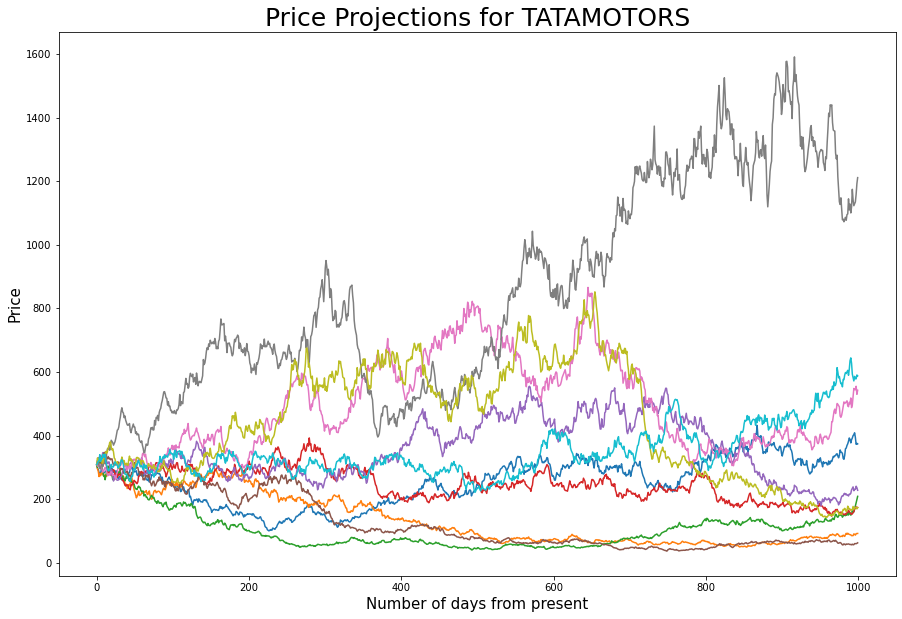

In [65]:
#using matplotlib.pyplot to plot the price projections that we created in the simulation.
plt.figure(figsize = (15,10))
plt.ylabel("Price", fontsize = 15)
plt.xlabel("Number of days from present", fontsize = 15)
plt.title("Price Projections for TATAMOTORS", fontsize = 25
plt.plot(pricelist)

The above figure shows 10 iterations for the price of TATAMOTORS stock over 1000 future days based on its day closing price since 2007. 

In [71]:
pricelist[-1]

array([ 373.89701051,   92.36204284,  208.99867257,  174.04737993,
        228.17978817,   62.84222828,  542.60163382, 1211.45488339,
        173.71137014,  587.95320004])

In [91]:
result = pd.DataFrame({'Scenario': ['Bear', 'Base','Bull'], 'Price': [pricelist[-1].min(), pricelist[-1].mean(),pricelist[-1].max()]})
result

,Scenario,Price
0,Bear,62.842228
1,Base,365.604821
2,Bull,1211.454883


Our projections can be summarised in the 3 scenarios. 
1. Bear Case: Our simulation projects a minimum price of 62.8 for the stock.
2. Base Case: Using the mean of all the project prices, we can see that the base scenario price will be 365.4.
3. Bull Case: With a bull scenario price of the 1211.4, the stock could turn into a great pick for investors.
